In [1]:
import numpy as np

import sys
sys.path.insert(0,r'/home/markus/repos/uni/16ma/bicycle/python')
from models.load_data_set import load_data_set, load_trajectory_dump
from bicycle.plot_bicycle_trajectories import position, state, add_default_reward_info

In [2]:
import holoviews as hv

hv.notebook_extension()
hv.ipython.display_hooks.ABBREVIATE_TRACEBACKS = False
%output holomap='auto' widgets='embed'
%output size=150 dpi=120 max_frames=1000
%opts Points (s=20) Overlay [legend_position='bottom_left']
%opts Spread (alpha=0.4)
%opts Curve[show_title=True, title_format='{label}']
%opts Overlay[show_title=True show_grid=True title_format='{label}']
%opts Overlay.State[xaxis='bare', yaxis='bare']
%opts GridMatrix[padding=0.25 show_title=False xaxis=None yaxis=None normalize=False shared_xaxis=True] {+framewise}
%opts Layout[show_title=False]

In [4]:
dump_names = [
    "name=evaluation__posterior=linearization__kernel=rbf__N=60000__M=50__noise=None__horizon=15__actions=2__particles=250__pso_method=full__hinting=True__iter=80.12",
    "name=evaluation_no_posterior__posterior=linearization__kernel=rbf__N=60000__M=50__noise=None__horizon=15__actions=2__particles=250__pso_method=full__hinting=True__iter=80.12",
    "name=evaluation__posterior=one_step__kernel=rbf__N=60000__M=50__noise=None__horizon=15__actions=2__particles=250__pso_method=full__hinting=True__iter=80.12",
    "name=evaluation__posterior=means_only__kernel=rbf__N=60000__M=50__noise=None__horizon=15__actions=2__particles=250__pso_method=full__hinting=True__iter=80.12",
]
short_names = {
    'linearization': dump_names[0],
    'linearization_no_truncation': dump_names[1],
    'one_step': dump_names[2],
    'means_only': dump_names[3],
}

dump_path = r'/home/markus/repos/uni/16ma/bicycle/evals/26/trajectories/'

dumps = {
    name: load_trajectory_dump(dump_path, name)
    for name in dump_names
}
time_steps = {
    name: sorted(list(dumps[name][1].keys()))
    for name in dump_names
}

b':GridMatrix   [Xignore,Yignore]\n   :Curve   [Time]   (y)'
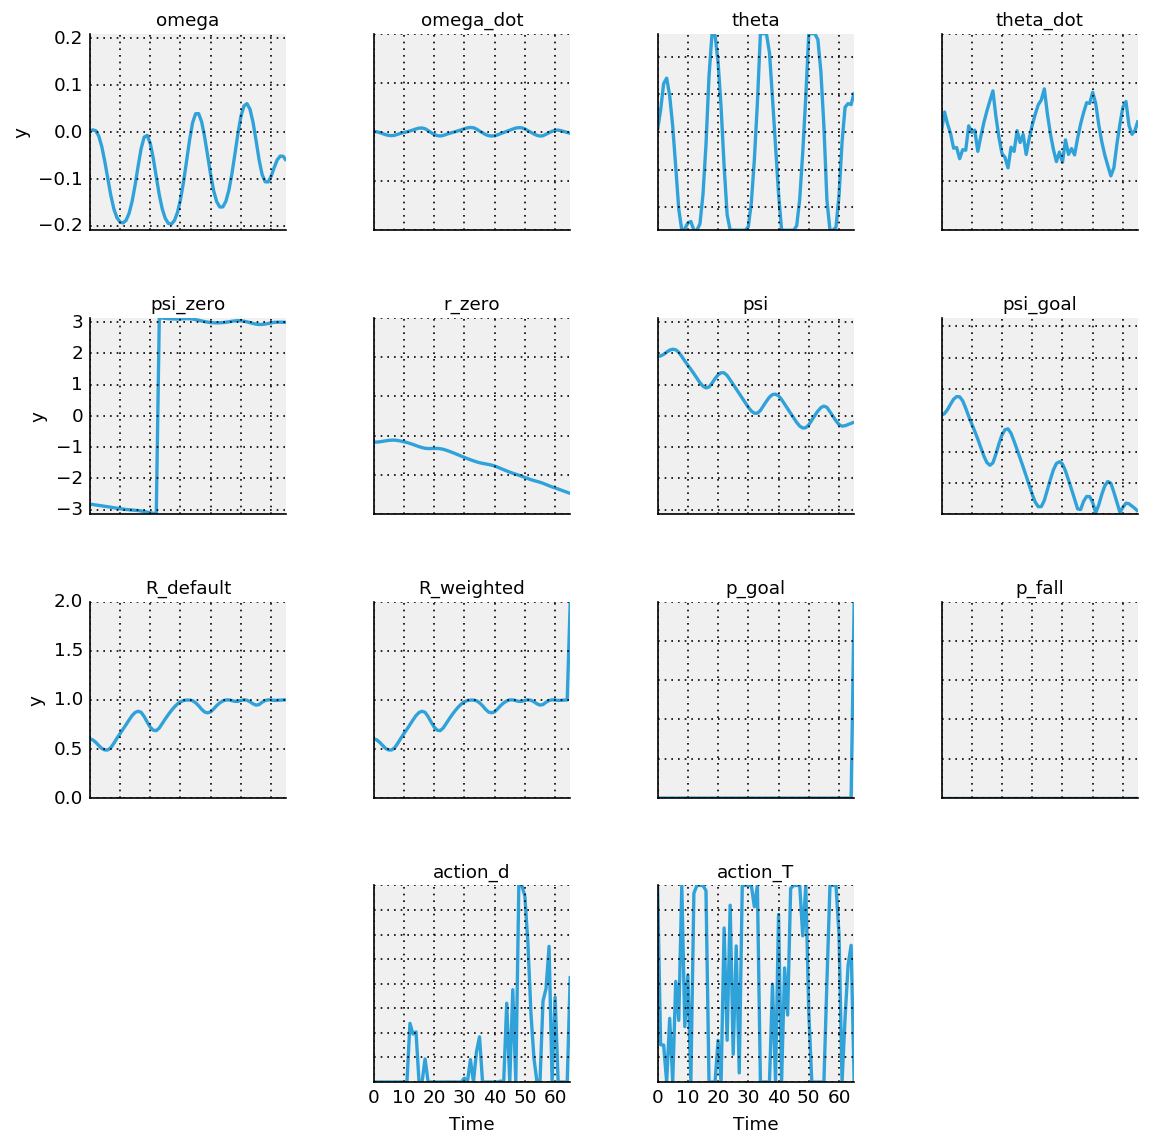

In [12]:
%%output filename="tg_single_trajectory" fig="png"

hv.GridMatrix(state(dumps[short_names['linearization']][0]))

b':GridMatrix   [Xignore,Yignore]\n   :Curve   [Time]   (y)'
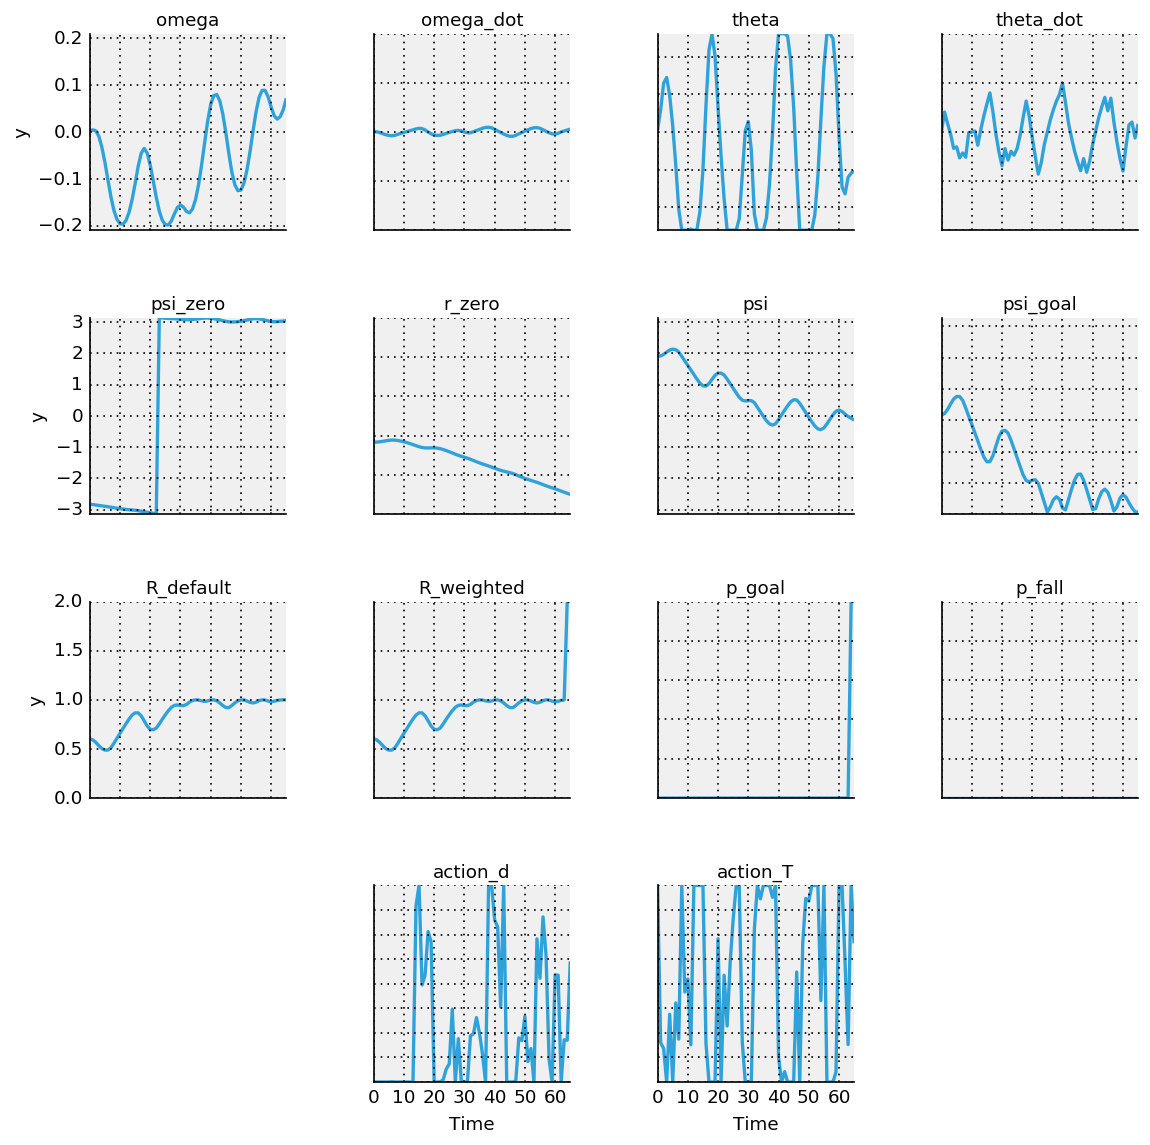

In [13]:
%%output filename="ms_single_trajectory" fig="png"

hv.GridMatrix(state(dumps[short_names['linearization_no_truncation']][0]))

b':GridMatrix   [Xignore,Yignore]\n   :Curve   [Time]   (y)'
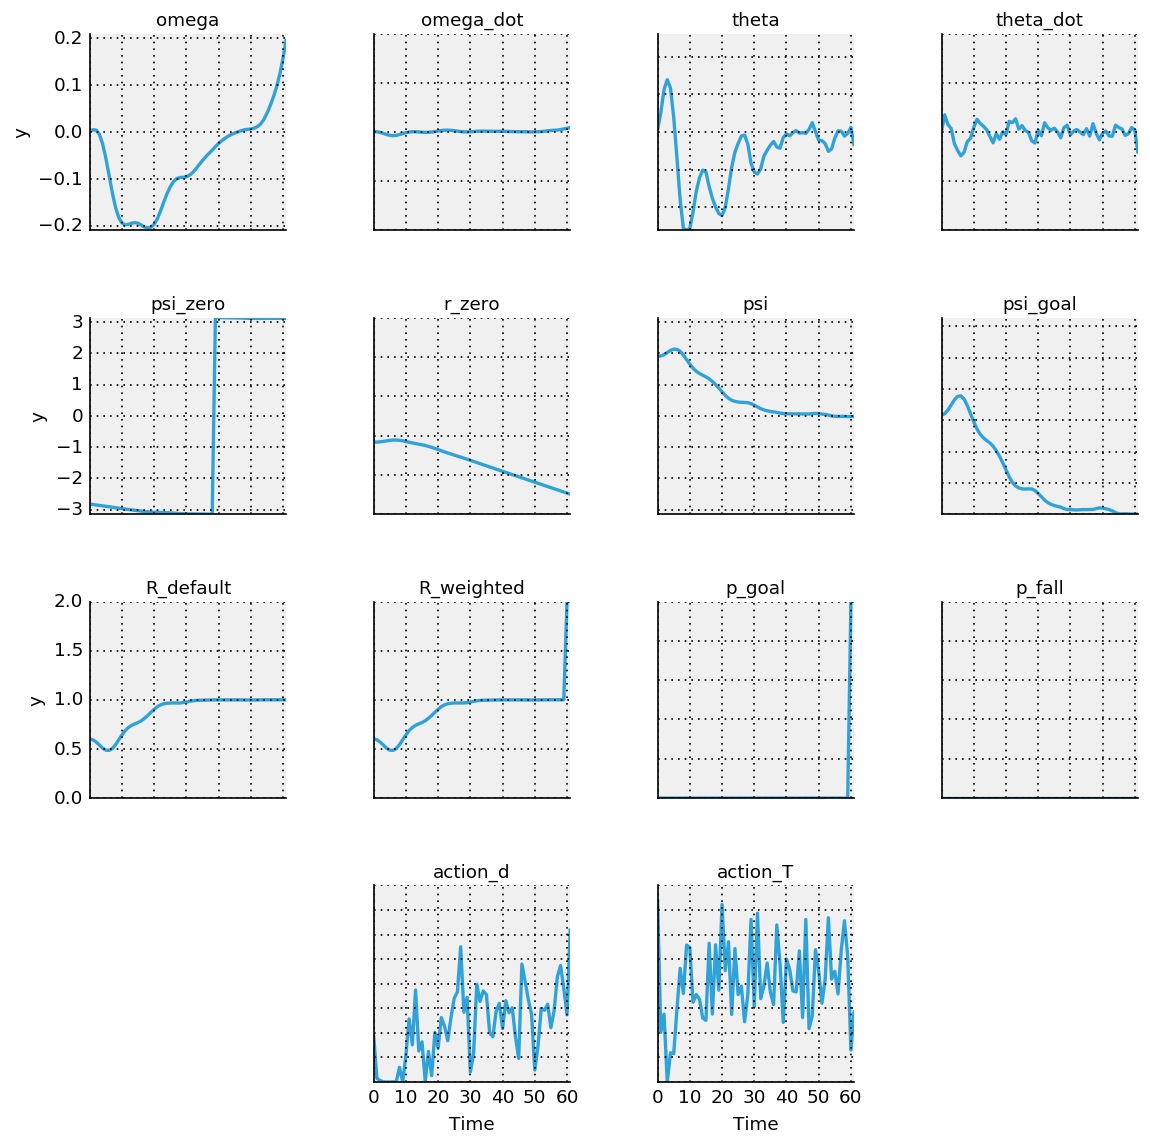

In [11]:
%%output filename="os_single_trajectory" fig="png"

hv.GridMatrix(state(dumps[short_names['one_step']][0]))

b':GridMatrix   [Xignore,Yignore]\n   :Curve   [Time]   (y)'
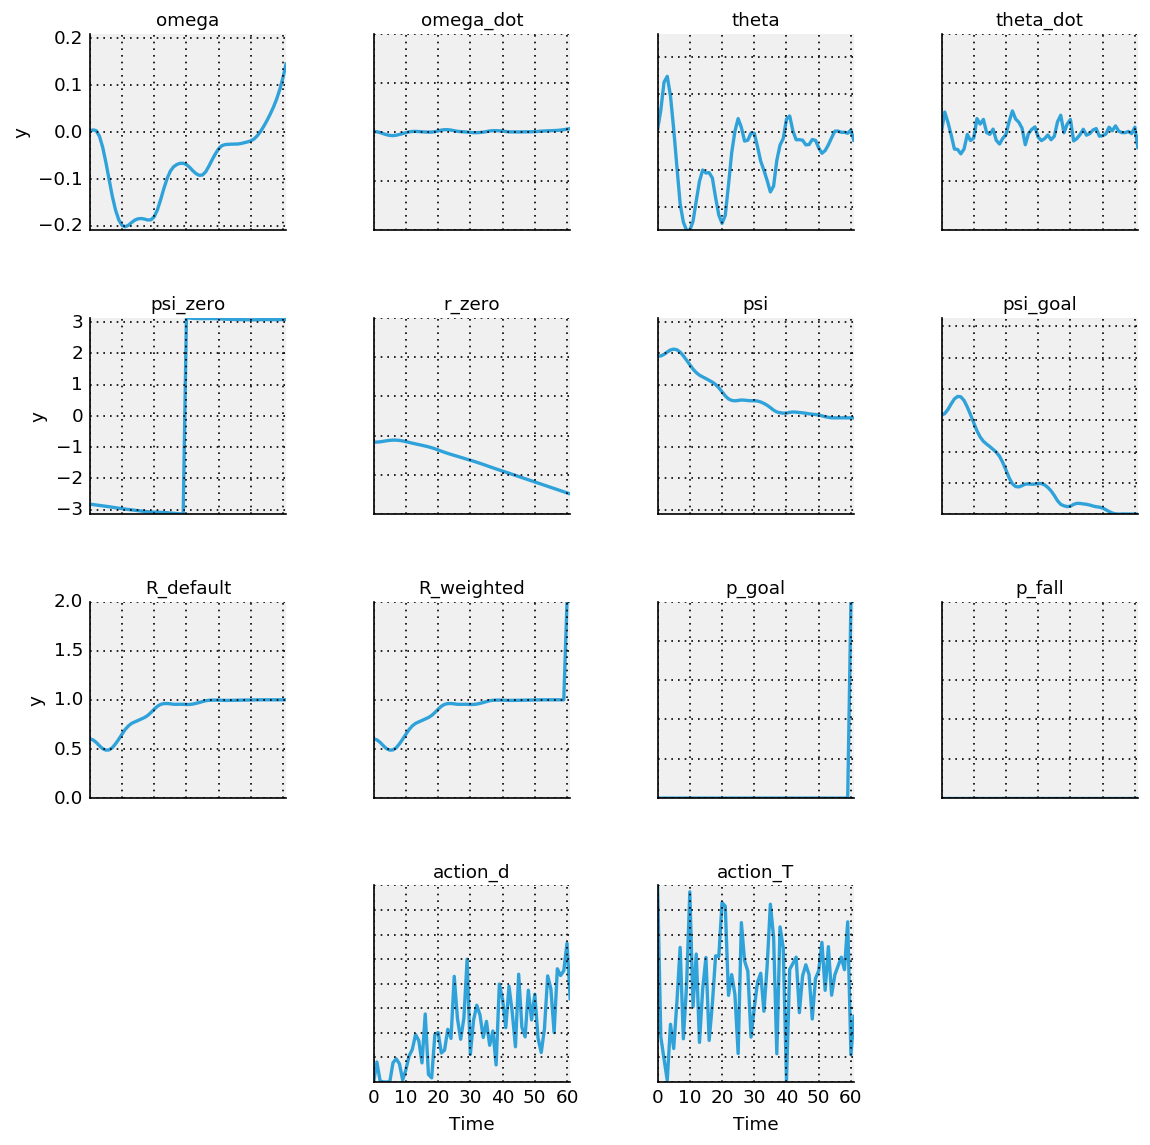

In [10]:
%%output filename="map_single_trajectory" fig="png"

hv.GridMatrix(state(dumps[short_names['means_only']][0]))